## Note that you need a dataset to execute the codes:
- random_order_v3.mat
- Dot_train.mat
- Dot_train_Y.mat
- Dot_test.mat
- Dot_test_Y.mat

## You can write your codes in this file or you can use the other IDEs

In [9]:
import scipy.io
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
mat = scipy.io.loadmat('..\Data\Dot_train.mat')
mat2 = scipy.io.loadmat('..\Data\Dot_train_Y.mat')

Train = np.array(mat.get('Dot_train'))
Tra_Y = mat2.get('Dot_train_Y')

In [10]:
sub = 5
idx_NT = np.where(Tra_Y[sub,:] == 1)
idx_PA = np.where(Tra_Y[sub,:] == 3)
Tra_NT = np.squeeze(Train[idx_NT,:,0:100,sub])
Tra_PA = np.squeeze(Train[idx_PA,:,0:100,sub])

## Task 1. Create the function "signed_r(T, N)" to calculate the r-value for the input parameters (target and non-target) trials along with the individual time points.
- You can select one specific channel and the function will return the R-value for this specific channel
- or you can take entire channels and return the r with (100, 32) format. 
- you can refer to the 1,2 homeworks
``` python
signed_r(T, N):
    return r
```

In [9]:
# write your codes here
def signed_r(Target, nTarget):
   
    return r_value2

## Task 2. Draw the average ERP responses and r-vaelu for the channel indexes: 0, 11, 17, 31.

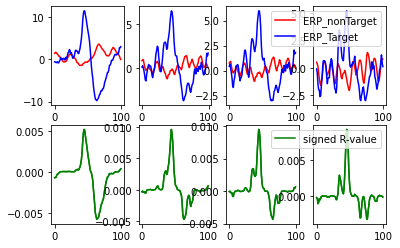

In [15]:
# write your codes here


In [11]:
# Jumping mean average feature : concat over the channel dim
Ntm = np.ones([2800, 32, 10])
Atm = np.ones([280, 32, 10])

j=0
for i in range(0, 100, 10):    
    Ntm[:,:,j] = np.mean(Tra_NT[:,:,list(range(i,i+10))], axis=2)
    Atm[:,:,j] = np.mean(Tra_PA[:,:,list(range(i,i+10))], axis=2)
    j += 1

Ntm = Ntm.reshape((2800, 320), order = 'C')
Atm = Atm.reshape((280, 320), order = 'C')
            
ft_tra_NT = Ntm
ft_tra_AC = Atm

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

Y = np.concatenate((np.ones(len(ft_tra_NT)), np.ones(len(ft_tra_AC))+1))
clf = LinearDiscriminantAnalysis()
clf.fit(np.concatenate((ft_tra_NT, ft_tra_AC), axis = 0), Y)

LinearDiscriminantAnalysis()

In [13]:
# Test dataset
mat = scipy.io.loadmat('..\Data\Dot_test.mat')
mat2 = scipy.io.loadmat('..\Data\Dot_test_Y.mat')

Test = np.array(mat.get('Dot_test'))
Test_Y = mat2.get('Dot_test_Y') 

idx_NT = np.where(Test_Y[sub,:] == 1)
idx_PA = np.where(Test_Y[sub,:] == 3)
Test_NT = np.squeeze(Test[idx_NT,:,0:100,sub])
Test_PA = np.squeeze(Test[idx_PA,:,0:100,sub])

Ntm = np.ones([3200, 32, 10])
Atm = np.ones([320, 32, 10])

j=0
for i in range(0, 100, 10):    
    Ntm[:,:,j] = np.mean(Test_NT[:,:,list(range(i,i+10))], axis=2)
    Atm[:,:,j] = np.mean(Test_PA[:,:,list(range(i,i+10))], axis=2)
    j += 1

Ntm = Ntm.reshape((3200, 320), order = 'C')  
Atm = Atm.reshape((320, 320), order = 'C')   

Test_all = np.concatenate([Ntm, Atm], axis = 0)


In [19]:
out = clf.predict(Test_all)
print(out)
out = clf.predict_proba(Test_all)
print(out)

[1. 1. 1. ... 1. 2. 1.]
[[9.68032433e-01 3.19675666e-02]
 [9.99295001e-01 7.04999271e-04]
 [9.80316471e-01 1.96835292e-02]
 ...
 [9.90303800e-01 9.69620011e-03]
 [9.20608095e-02 9.07939190e-01]
 [9.55154951e-01 4.48450490e-02]]


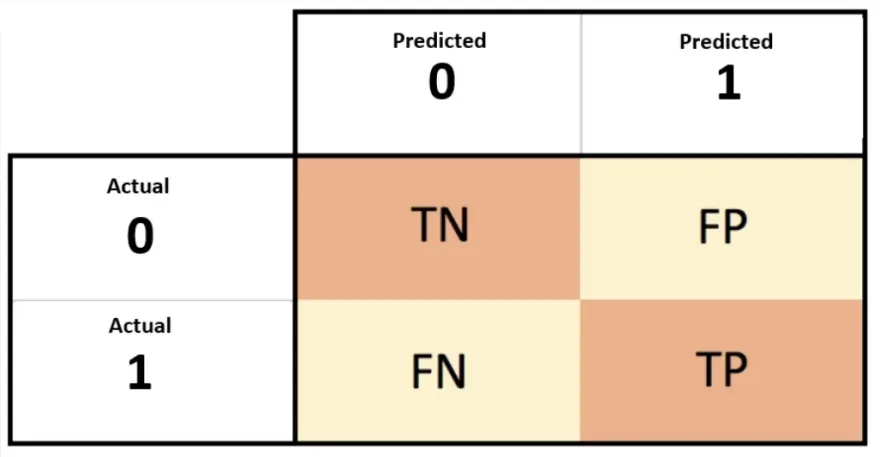

### True Positive
- A True Positive is the correct identification of anomalous data as such, e.g., classifying as “abnormal” data which is in fact abnormal.

### True Negative
- A True Negative is the correct identification of data as not being anomalous, i.e. classifying as “normal” data which is in fact normal.

### False Positive
- A False Positive is the incorrect identification of anomalous data as such, i.e. classifying as “abnormal” data which is in fact normal.

### False Negative
-  A False Negative is the incorrect identification of data as not being anomalous, i.e. classifying as “normal” data which is in fact abnormal.

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, recall_score, accuracy_score, precision_score, f1_score, classification_report

Yt = np.concatenate((np.zeros(len(Ntm)), np.zeros(len(Atm))+1))
conf = confusion_matrix(Yt, clf.predict(Test_all)-1)
print(conf)

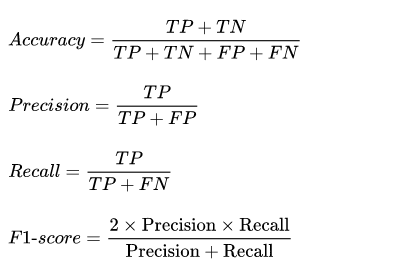

In [21]:
print(classification_report(Yt, clf.predict(Test_all)-1))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      3200
         1.0       0.55      0.44      0.49       320

    accuracy                           0.92      3520
   macro avg       0.75      0.70      0.72      3520
weighted avg       0.91      0.92      0.91      3520



In [22]:
print("accuracy:", accuracy_score(Yt, clf.predict(Test_all)-1))
print("precision: ", precision_score(Yt, clf.predict(Test_all)-1))
print("f1_score:", f1_score(Yt, clf.predict(Test_all)-1))
print("recall_score:", recall_score(Yt, clf.predict(Test_all)-1))

accuracy: 0.9159090909090909
precision:  0.5465116279069767
f1_score: 0.4878892733564014
recall_score: 0.440625


## Task 3. From the given LDA outputs and true label, calculate 1) accuracy, 2) precision, 3) f1_score, 4) sensitivity, and 5) specificity by yourself. 
### - You can use TP/FN/TN/FP values from the confusion_matrix function.
### - You can't use the functions (on above cell) for calculating the metrics

In [23]:
# write your codes here


Acc:  0.9159090909090909
Precision:  0.5465116279069767
F1:  0.48788927335640137
Sen.:  0.440625
Spec.:  0.9634375


## The ROC plot is a model-wide evaluation measure that is based on two basic evaluation measures 
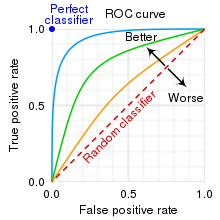

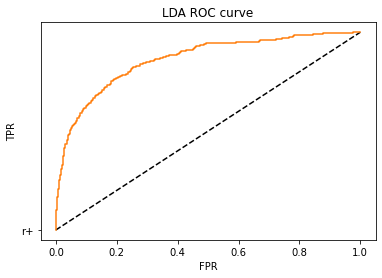

0.8619111328124999
1.0
accuracy: 0.9090909090909091
0.5


In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, recall_score, accuracy_score, precision_score, f1_score, classification_report

Yt = np.concatenate((np.zeros(len(Ntm)), np.zeros(len(Atm))+1))
fpr, tpr, thresholds = roc_curve(Yt, clf.predict_proba(Test_all)[:,1])


plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='LDA')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LDA ROC curve')
plt.show()
##

print(roc_auc_score(Yt, clf.predict_proba(Test_all)[:, 1]))
print(roc_auc_score(Yt, Yt))

print("accuracy:", accuracy_score(Yt, np.zeros(3520)))
print(roc_auc_score(Yt, np.ones(3520)))


## Task 4: Import at least 3 additional classifiers and calculate the model's performances based on the ROC curve. 
- Plot the ROC curve with the AUC score for individual models

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


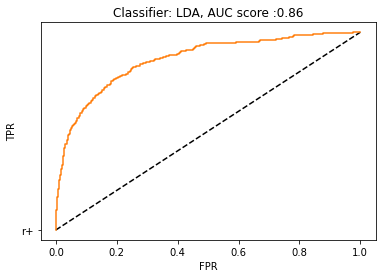

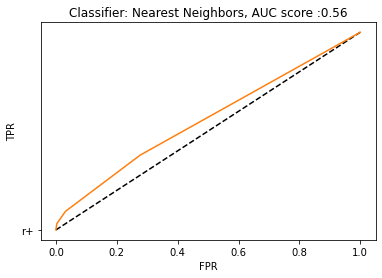

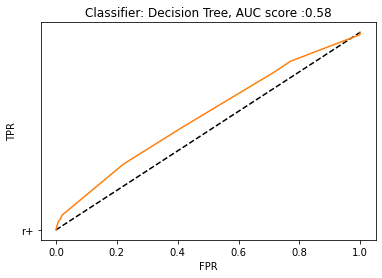

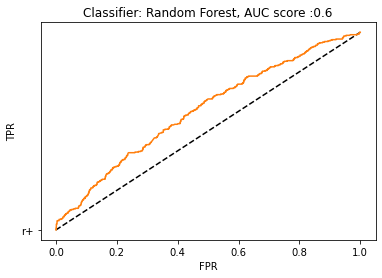

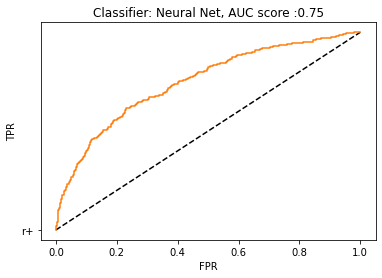

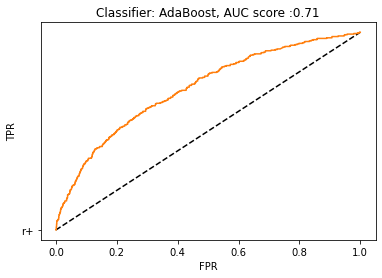

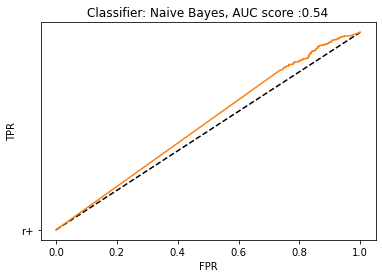

In [26]:
# writer your code here



## Task 5_1: find the best model based on the AUC score then apply it to the spelling classification

In [15]:
clf = LinearDiscriminantAnalysis() # Here you put your best model 
clf.fit(np.concatenate((ft_tra_NT, ft_tra_AC), axis = 0), Y)

LinearDiscriminantAnalysis()

In [16]:

## offline spelling performance

Matrix = ['A', 'B', 'C', 'D', 'E', 'F',\
    'G', 'H', 'I', 'J', 'K', 'L', \
    'M', 'N', 'O', 'P', 'Q', 'R', \
    'S', 'T', 'U', 'V', 'W', 'X', \
    'Y', 'Z', '1', '2', '3', '4', \
    '5', '6', '7', '8', '9', 'ESC']

Text = ['U', '3', 'R', 'Q', 'J','S','M','A','U','W','E','S','2','Q','E','F',\
    'K','O','R','E','A','U','N','I','V','E','R','S','I','T','Y','ESC'];

order = scipy.io.loadmat('random_order_v3.mat')
order = order.get('random_order')
random_order = np.zeros((12, 6, 10), dtype=np.uint32)
for i in range(10):
    random_order[:, :, i] = np.squeeze(order)[i]    

In [17]:
Test2 = Test[:, :, :, sub]    
Ttm = np.ones([3840, 32, 10])
j=0
for i in range(0, 100, 10):  
        Ttm[:,:,j] = np.mean(Test2[:,:,list(range(i,i+10))], axis=2)   
        j += 1

Ttm = Ttm.reshape((3840, 32*10))   
Ttm = Ttm.transpose()
reDat = Ttm.reshape(320, 12, 10, 32, order = 'F')

In [18]:
save = list()    
pre = list()
Lett = np.array
for L in range(len(Text)):
    Dat = reDat[:,:,:,L]
    
    Dat_L = np.ones((320, 36, 10))
    Dat_C = np.ones((320, 36, 10))
    
    for j in range(10):
        for i in range(6):
            for k in range(6):        
                Dat_L[:, random_order[i, k, j]-1 , j] = Dat[:, i, j]
                Dat_C[:, random_order[i+6, k, j]-1 , j] = Dat[:, i+6, j]

    for j in range(1,11):
        if j==0:
            x_L = Dat_L[:,:,j]
            x_C = Dat_C[:,:,j]
        else: 
            x_L = np.mean(Dat_L[:,:,0:j], axis = 2)
            x_C = np.mean(Dat_C[:,:,0:j], axis = 2)      
        
        out_L = clf.predict_proba(x_L.transpose())
        out_C = clf.predict_proba(x_C.transpose())
        
        save.append(np.sum((out_L[:,1], out_C[:,1]), axis=0))
        
        max_value = np.sum((out_L[:,1], out_C[:,1]), axis=0).max()
        max_index = np.where(np.sum((out_L[:,1], out_C[:,1]), axis=0)==max_value)
        
        pre.append(Matrix[int(max_index[0][0])])
        

In [19]:
Lett = np.reshape(pre, (32, 10))

ACC_LDA = list()
acText = Text
acc = list()
for j in range(10):
    tm = Lett[:][:,j]
    ACC_LDA.append(np.size((np.where(acText[1::2]==tm[1::2]))) / 16)

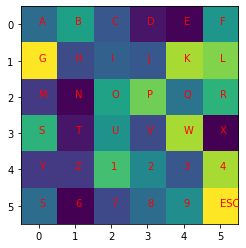

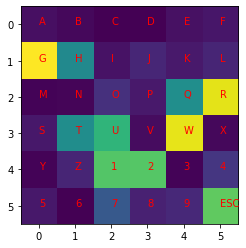

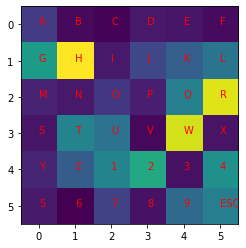

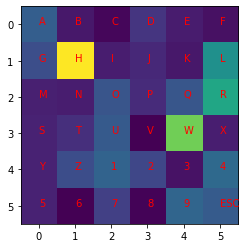

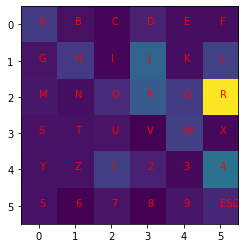

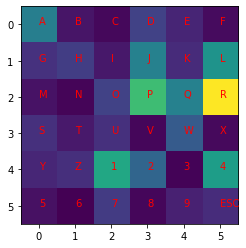

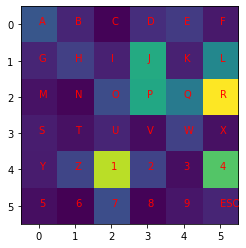

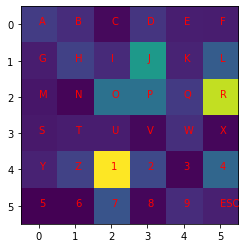

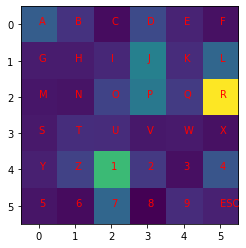

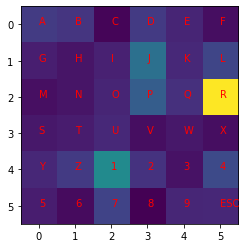

In [32]:
import time
visual = np.array(save)

a = visual[20:30,:]
for k in range(10):  
    plt.figure()
    plt.imshow(a[k].reshape((6, 6)))
    idx = 0
    for i in range(6):
        for j in range(6):
                plt.text(j, i, Matrix[idx], color = 'red')
                idx = idx+1


### Information Transfer Rate (ITR):
* Information Transfer Rate (ITR) is the standard method for measuring the performance of communication for control systems, especially for Brain-Computer Interfaces. 
* It is the amount of information transferred per unit time.
* The ITR is usually calculated in bits/min, by using the given formulas
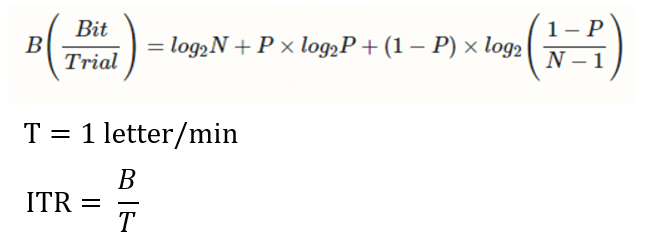

where:
#### B= information transferred in bits per trial,
#### N= number of targets (for this example the default value of 4 is used),
#### P= classification accuracy. 
* It is calculated by dividing number of correct command classifications by the total number of classified commands, e.g. for word "BRAIN", spelled as "BURKAIN"; the accuracy, calculated on the letters level (e.g. for a P300 BCI) is: P= 5/7 = 0.7413 = 74.13%

## Task 5_2: Calculate the ITRs with the given parameters and plot it with the accuracy. 
- if the accuracy in specific sequence is 1 (100%) then you should substract small value: 1 - 0.001 to avoid NAN. 

In [21]:
N = 36  # ststic variable
P = ACC_LDA[0] # it should be changed according to the model 
T = 80*(0+1)/6000 # static variable  T    

print(ACC_LDA)

[0.25, 0.5625, 0.6875, 1.0, 0.9375, 0.9375, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'ITR[bit/min]')

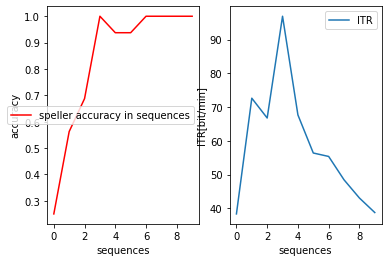

In [34]:
# write your code here